In [34]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist


matplotlib.pyplot.style.use('fivethirtyeight')
%matplotlib inline

In [35]:
# Settings

classes=10
num_iterations=1000

In [53]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

X_train=X_train[0:100]
Y_train=Y_train[0:100]
# Converting the image to one-long vector.
X_train=np.reshape(X_train,newshape=(X_train.shape[0],-1))
X_test=np.reshape(X_test,newshape=(X_test.shape[0],-1))

# Reshaping the label from : (rows,) -----> (rows,1).
Y_train=np.reshape(Y_train,newshape=(Y_train.shape[0],1))
Y_test=np.reshape(Y_test,newshape=(Y_test.shape[0],1))

# Converting to the labels to one-hot vectors.
Y_train_hot =(np.arange(classes)==Y_train[:,:]).astype(np.float32)
Y_test_hot = (np.arange(classes)==Y_test[:,:]).astype(np.float32)


In [54]:
# Network Settings

LEARNING_RATE=0.001
features=X_train.shape[1]

In [38]:
class NeuralNetwork:
    
    def __init__(self):
        
        tf.reset_default_graph()
        
        self.input=tf.placeholder(dtype=tf.float32,shape=[None,features],name='input')
        self.label=tf.placeholder(dtype=tf.float32,shape=[None,classes],name='label')
        
        self.layer1=tf.layers.dense(units=100,activation=tf.nn.tanh,inputs=self.input)
        self.layer2=tf.layers.dense(units=90,activation=tf.nn.tanh,inputs=self.layer1)
        self.layer3=tf.layers.dense(units=80,activation=tf.nn.tanh,inputs=self.layer2)
        self.layer4=tf.layers.dense(units=70,activation=tf.nn.tanh,inputs=self.layer3)
        self.layer5=tf.layers.dense(units=60,activation=tf.nn.tanh,inputs=self.layer4)
        self.layer6=tf.layers.dense(units=50,activation=tf.nn.tanh,inputs=self.layer5)
        self.layer7=tf.layers.dense(units=40,activation=tf.nn.tanh,inputs=self.layer6)
        self.layer8=tf.layers.dense(units=30,activation=tf.nn.tanh,inputs=self.layer7)
        
        self.output=tf.layers.dense(units=10,activation=None,inputs=self.layer8)
        
        self.loss=tf.losses.softmax_cross_entropy(onehot_labels=self.label,logits=self.output)
        self.optimizer=tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
        self.gradients=self.optimizer.minimize(self.loss)
        
        
        self.isCorrect=tf.equal(tf.argmax(self.label,1),tf.argmax(self.output,1))
        self.accuracy=tf.reduce_mean(tf.cast(self.isCorrect,tf.float32))
        
        
        self.session=tf.Session()
        
        self.init=tf.global_variables_initializer()
        self.session.run(self.init)
        
        self.saver=tf.train.Saver(max_to_keep=1)
    
    def predict(self,X):
        #state=np.reshape(state,newshape=(1,state_size))
        
        return self.session.run(self.output,feed_dict={self.input:X})
    
    
    def train(self,X,Y):
        _,loss=self.session.run([self.gradients,self.loss],feed_dict={self.input:X,self.label:Y})
        
        return loss
    
    
    def get_loss(self,X,Y):
            
        loss=self.session.run(self.loss,feed_dict={self.input:X,self.label:Y})
        return loss
    
    
    def get_accuracy(self,X,Y):
        
        return self.session.run(self.accuracy,feed_dict={self.input:X,self.label:Y})
    
    def save_model(self):
        self.saver.save(self.session,"./EarlyStopping")
        return None
    

In [39]:
def compare_plots(title,data1,plot_name1,data2,plot_name2,
              xlabel,ylabel,file_name):
    
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.plot(data1, label=plot_name1)
    plt.hold(True)
    plt.plot(data2, label=plot_name2)
    plt.hold(False)
    plt.legend(loc='upper left', frameon=True)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(file_name)

    
    return None

In [75]:
# Initialize the Network

network=NeuralNetwork()
losses=[]

train_losses=[]
test_losses=[]

trains_accuracy=[]
tests_accuracy=[]

Early_stopping_points=[]
esp_limit=3

In [76]:
for iteration in range(num_iterations):
        
        test_loss=network.get_loss(X_test,Y_test_hot)
        
        train_loss=network.train(X_train,Y_train_hot)
        
        
        #if iteration%5==0:
            
        test_accuracy=network.get_accuracy(X_test,Y_test_hot)
        train_accuracy=network.get_accuracy(X_train,Y_train_hot)
            
        old_test_loss=test_loss
        test_loss=network.get_loss(X_test,Y_test_hot)
            
        train_losses.append(train_loss)
        test_losses.append(test_loss)
            
        trains_accuracy.append(train_accuracy)
        tests_accuracy.append(test_accuracy)
        if test_loss> old_test_loss:
            Early_stopping_point.append(iteration)
                
            if len(Early_stopping_point)>=esp_limit:
                network.save_model()
                    
                print("Early stopping at iteration: {} ---------> Train Loss: {} , Test Loss: {}".format(iteration,
                                                                        train_loss,test_loss))
                print("Model is saved")
                break
            
            
            
            
        print('Generation: ' + str(iteration+1) + '. Loss = ' + str(train_loss))

Generation: 1. Loss = 2.3402317
Generation: 2. Loss = 2.1735923
Generation: 3. Loss = 2.0003884
Generation: 4. Loss = 1.903512
Generation: 5. Loss = 1.8049507
Generation: 6. Loss = 1.714496
Generation: 7. Loss = 1.6397115
Generation: 8. Loss = 1.5710379
Generation: 9. Loss = 1.5086938
Generation: 10. Loss = 1.4488847
Generation: 11. Loss = 1.3969377
Generation: 12. Loss = 1.3210269
Generation: 13. Loss = 1.2867411
Generation: 14. Loss = 1.2403693
Generation: 15. Loss = 1.200599
Generation: 16. Loss = 1.1451925
Generation: 17. Loss = 1.1128544
Generation: 18. Loss = 1.0691468
Generation: 19. Loss = 1.0259064
Generation: 20. Loss = 0.9755634
Generation: 21. Loss = 0.95184493
Generation: 22. Loss = 0.9206135
Generation: 23. Loss = 0.89301026
Generation: 24. Loss = 0.84599304
Generation: 25. Loss = 0.8440399
Generation: 26. Loss = 0.8133248
Generation: 27. Loss = 0.79678583
Generation: 28. Loss = 0.7605804
Generation: 29. Loss = 0.7264608
Generation: 30. Loss = 0.7323255
Early stopping at 

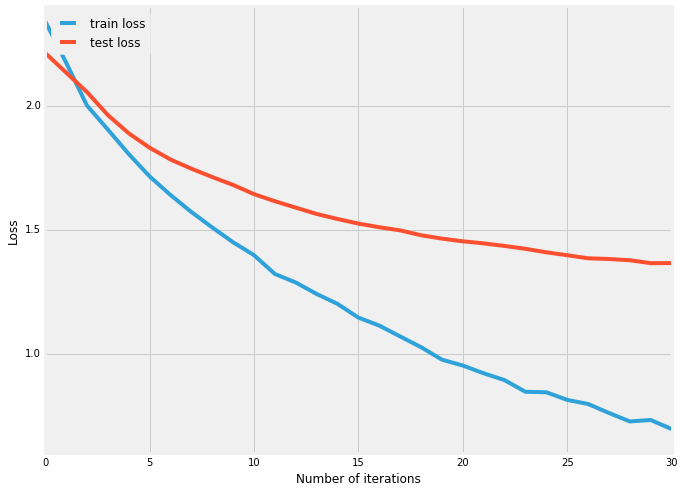

In [79]:
compare_plots(title='train loss VS test loss',
              data1=train_losses,
              plot_name1='train loss',
              data2=test_losses,plot_name2='test loss',
              xlabel='Number of iterations',
              ylabel='Loss',
              file_name='train_loss_VS_test_loss_with.png')

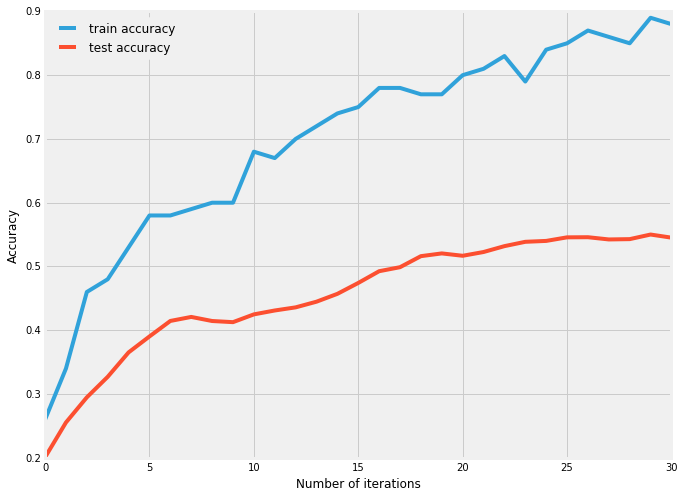

In [80]:
compare_plots(title='train accuracy VS test accuracy',
              data1=trains_accuracy,
              plot_name1='train accuracy',
              data2=tests_accuracy,
              plot_name2='test accuracy',
              xlabel='Number of iterations',
              ylabel='Accuracy',
             file_name="train_acc_VS_test_acc_with.png")